In [1]:
import os

In [7]:
# Directory with daisy pictures
daisy_dir = os.path.join('daisy')

# Directory with dandelion pictures
dandelion_dir = os.path.join('dandelion')

# Directory with rose pictures
rose_dir = os.path.join('rose')

# Directory with sunflower pictures
sunflower_dir = os.path.join('sunflower')

# Directory with tulip pictures
tulip_dir = os.path.join('tulip')

In [8]:
print('total daisy images:', len(os.listdir(daisy_dir)))
print('total dandelion images:', len(os.listdir(dandelion_dir)))
print('total rose images:', len(os.listdir(rose_dir)))
print('total sunflower images:', len(os.listdir(sunflower_dir)))
print('total tulip images:', len(os.listdir(tulip_dir)))

total daisy images: 100
total dandelion images: 100
total rose images: 100
total sunflower images: 100
total tulip images: 100


In [11]:
train_daisy_names = os.listdir(daisy_dir)
print(train_daisy_names[:5])

train_rose_names = os.listdir(rose_dir)
print(train_rose_names[:5])

['7188112181_571434b058_n.jpg', '6972675188_37f1f1d6f6.jpg', '854593001_c57939125f_n.jpg', '8083321316_f62ea76f72_n.jpg', '8684108_a85764b22d_n.jpg']
['99383371_37a5ac12a3_n.jpg', '5002451854_9cf0096db0_n.jpg', '5060536705_b370a5c543_n.jpg', '4998708839_c53ee536a8_n.jpg', '563847503_89e9756c80.jpg']


In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Showing some daisy pictures...



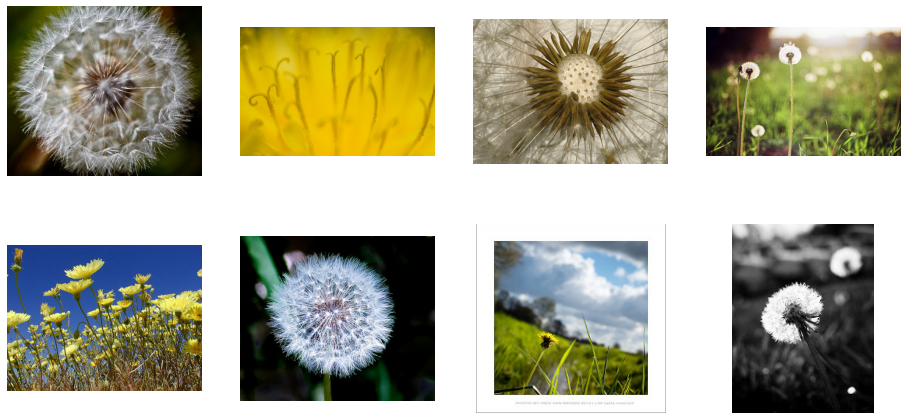

Showing some rose pictures...



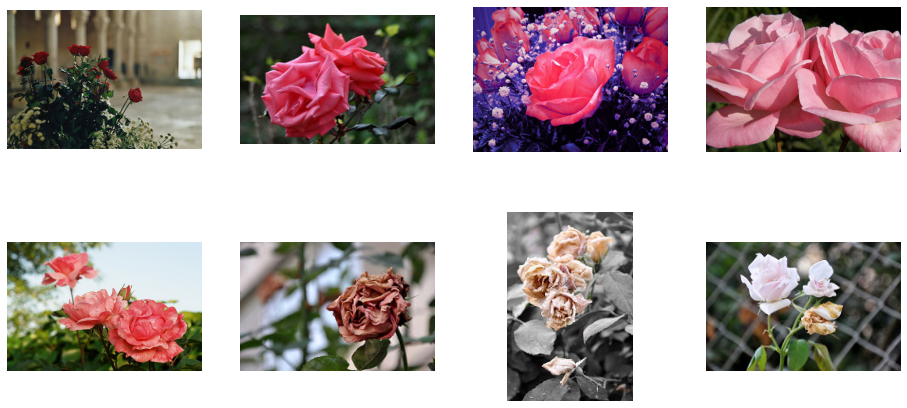

In [13]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_daisy_pix = [os.path.join(daisy_dir, fname) 
                for fname in train_daisy_names[pic_index-8:pic_index]]
next_rose_pix = [os.path.join(rose_dir, fname) 
                for fname in train_rose_names[pic_index-8:pic_index]]

print ("Showing some daisy pictures...")
print()
for i, img_path in enumerate(next_daisy_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

print ("Showing some rose pictures...")
print()
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(next_rose_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [14]:
batch_size = 128

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '../Data//flowers-recognition',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['daisy','dandelion','rose','sunflower','tulip'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 0 images belonging to 5 classes.


---

## Building the model

In [16]:
import tensorflow as tf

### Model architecture

In [17]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])

### Model summary

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        3

### Optimizer

In [19]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])